## Lavel 1 Project 2


**2)Stock Market Prediction And Forecasting Using Stacked LSTM**

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

- **Harsh Alkesh Pandya**
- **Batch Data Science April 1**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Import Data frame and lets perform basic things

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

## EDA

#### Univariate

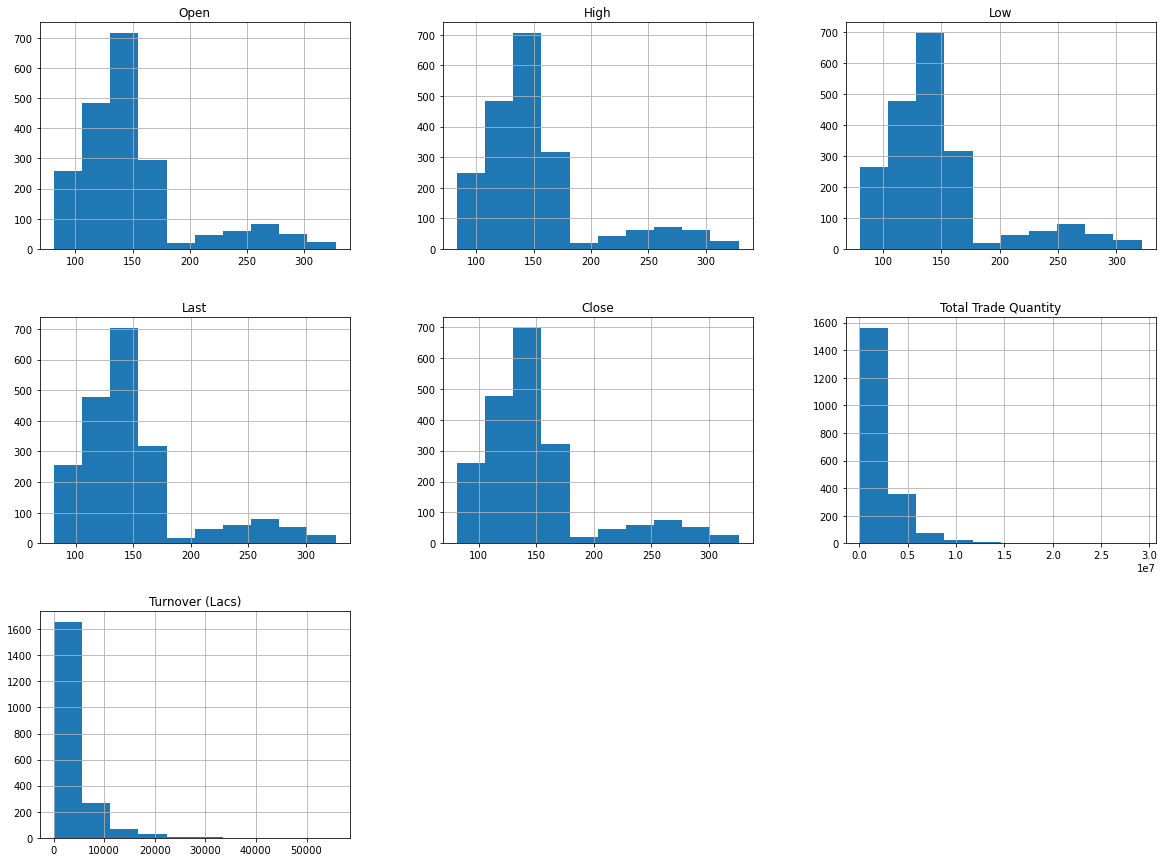

In [10]:
df.iloc[:, 1:].hist(figsize = (20,15))
plt.show()

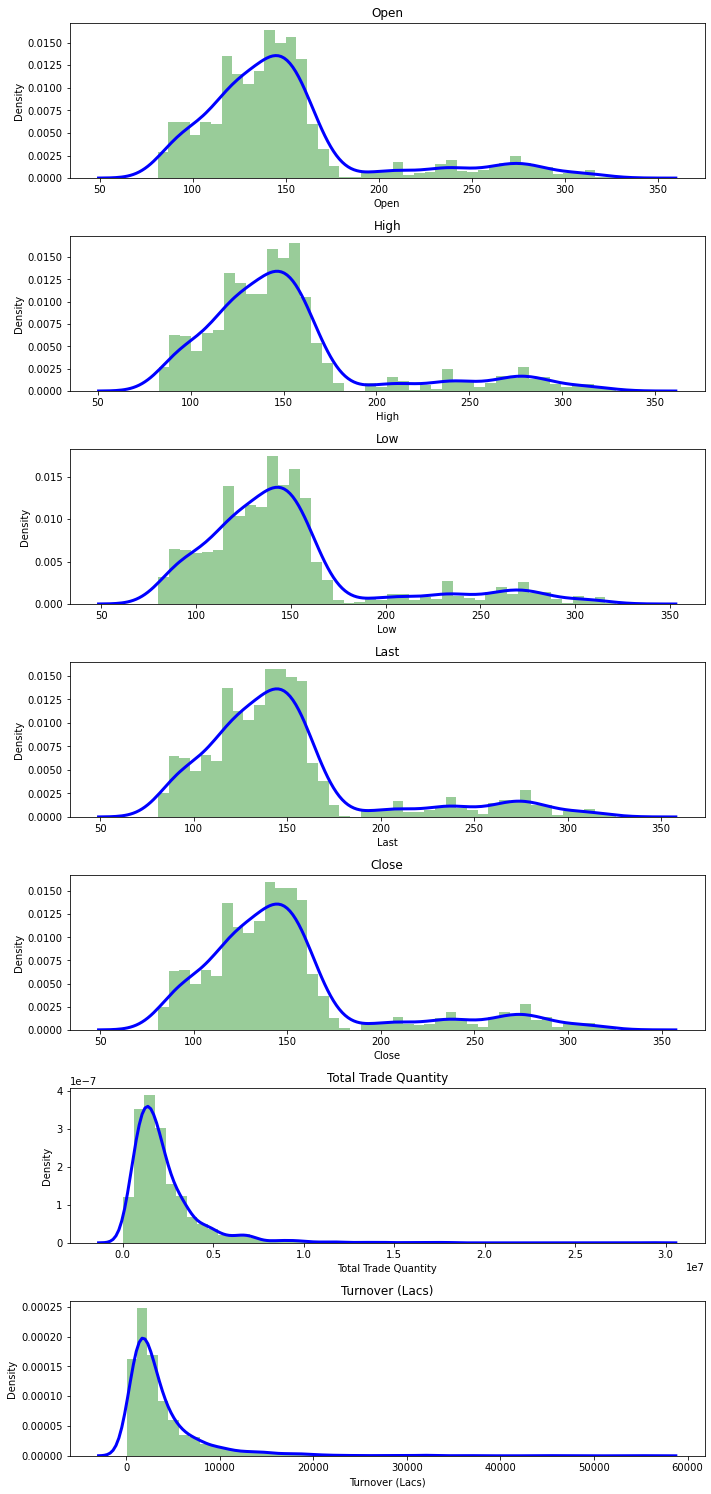

In [11]:
df_temp = df.iloc[: , 1:]
plt.figure(figsize=(10,50))
for i in range(len(df_temp.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df_temp[df_temp.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df_temp.columns[i])

plt.tight_layout()

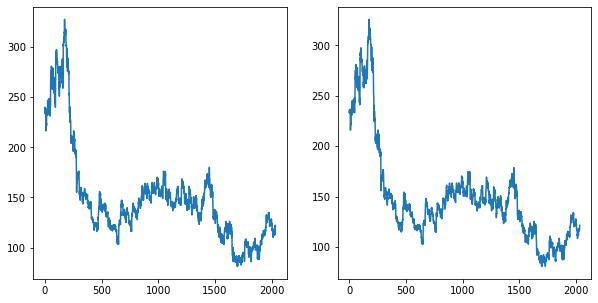

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['Open'])
plt.subplot(1,2,2)
plt.plot(df['Close'])
plt.show()

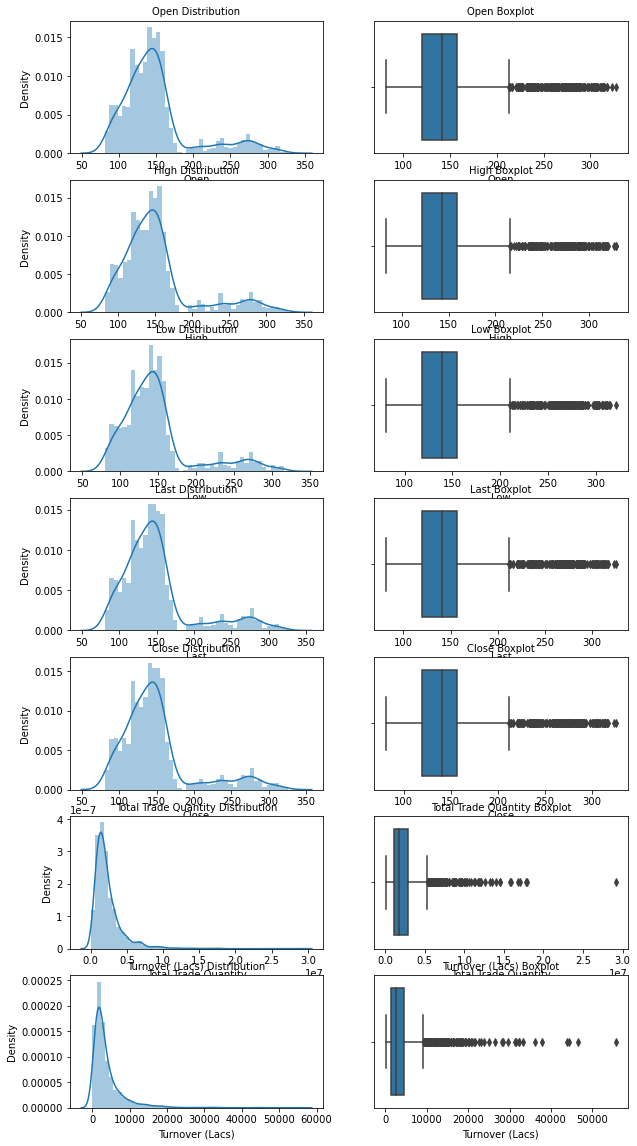

In [13]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Open'] , ax=axes[0][0])
a.set_title("Open Distribution",fontsize=10) 

a = sns.boxplot(df['Open'] , orient = "v" , ax=axes[0][1])
a.set_title("Open Boxplot",fontsize=10)

a = sns.distplot(df['High'] , ax=axes[1][0])
a.set_title("High Distribution",fontsize=10) 

a = sns.boxplot(df['High'] , orient = "v" , ax=axes[1][1])
a.set_title("High Boxplot",fontsize=10) 

a = sns.distplot(df['Low'] , ax=axes[2][0])
a.set_title("Low Distribution",fontsize=10)

a = sns.boxplot(df['Low'] , orient = "v" , ax=axes[2][1])
a.set_title("Low Boxplot",fontsize=10) 

a = sns.distplot(df['Last'] , ax=axes[3][0]) 
a.set_title("Last Distribution",fontsize=10) 

a = sns.boxplot(df['Last'] , orient = "v" , ax=axes[3][1])
a.set_title("Last Boxplot",fontsize=10); 

a = sns.distplot(df['Close'] , ax=axes[4][0]) 
a.set_title("Close Distribution",fontsize=10) 

a = sns.boxplot(df['Close'] , orient = "v" , ax=axes[4][1])
a.set_title("Close Boxplot",fontsize=10); 

a = sns.distplot(df['Total Trade Quantity'] , ax=axes[5][0]) 
a.set_title("Total Trade Quantity Distribution",fontsize=10) 

a = sns.boxplot(df['Total Trade Quantity'] , orient = "v" , ax=axes[5][1])
a.set_title("Total Trade Quantity Boxplot",fontsize=10); 

a = sns.distplot(df['Turnover (Lacs)'] , ax=axes[6][0]) 
a.set_title("Turnover (Lacs) Distribution",fontsize=10) 

a = sns.boxplot(df['Turnover (Lacs)'] , orient = "v" , ax=axes[6][1])
a.set_title("Turnover (Lacs) Boxplot",fontsize=10); 

# plt.show()

### Multy Variate

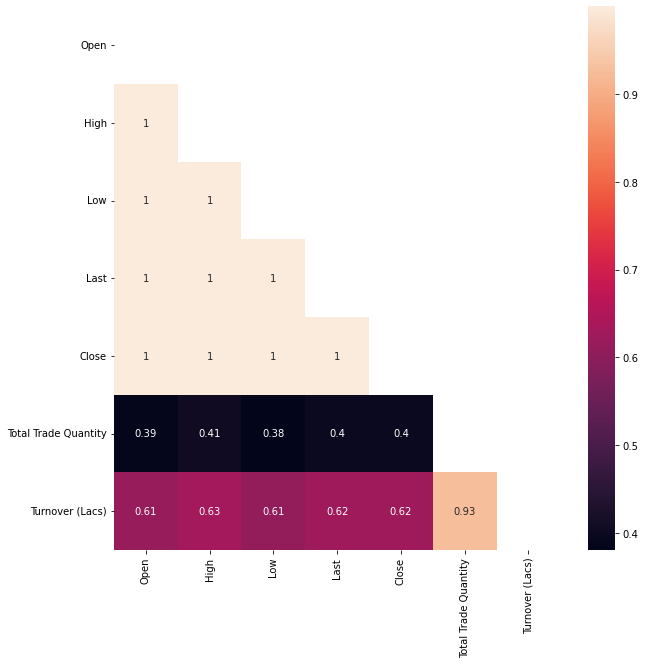

In [14]:
plt.figure(figsize= (10,10))
mask = np.zeros_like(df.iloc[:, 1:].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.iloc[:, 1:].corr(), annot = True, mask = mask)
plt.show()

## Outliers Treatment

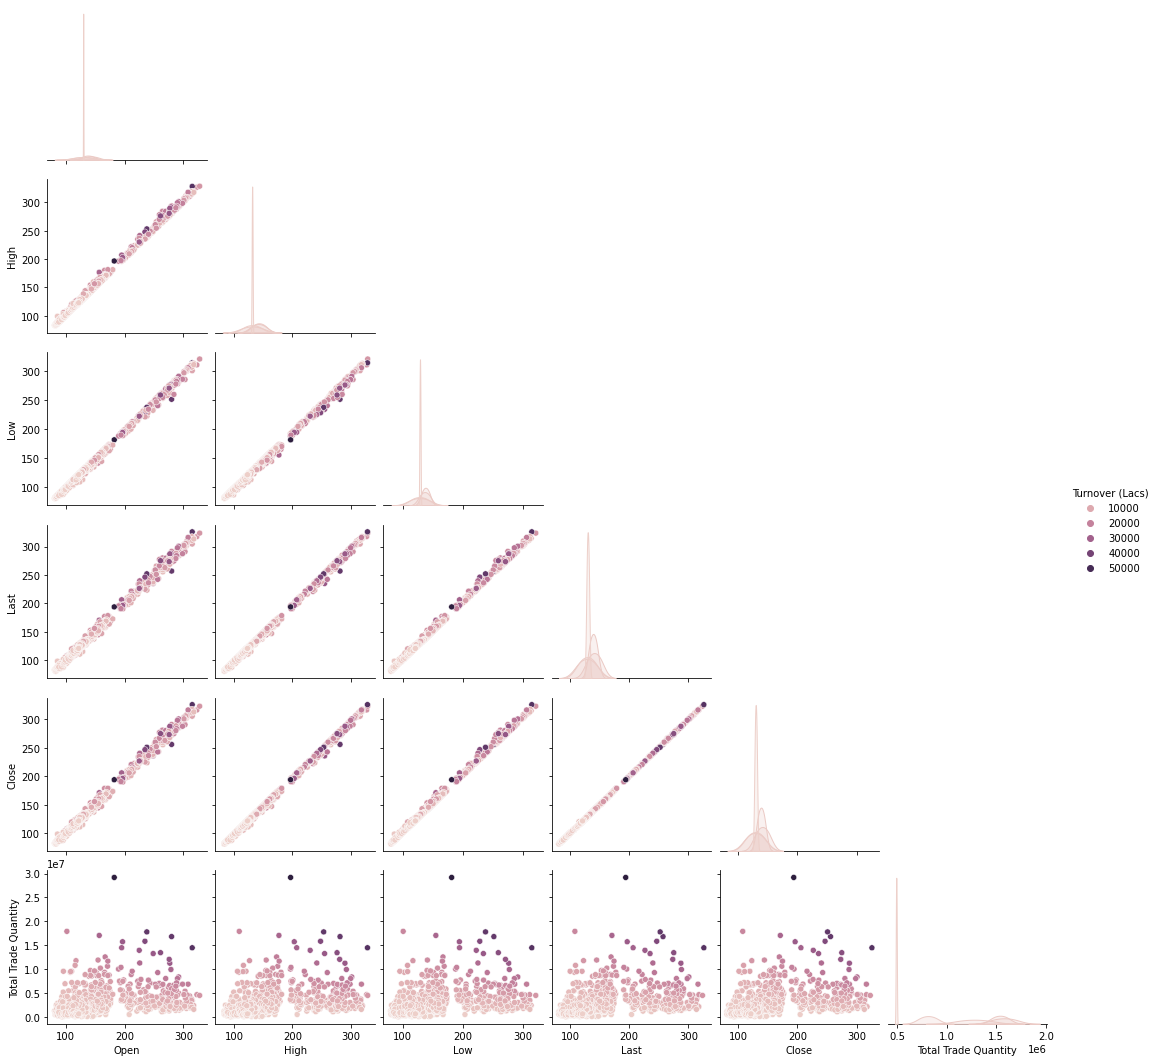

In [15]:
sns.pairplot(df.iloc[:, 1:], corner= True, hue = 'Turnover (Lacs)')
plt.show()

In [16]:
def remove_outliers(col):
    upper = df[col].quantile(0.75)
    lower = df[col].quantile(0.25) 
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25) 
    df[col] = np.where(df[col] < (lower - 1.5*IQR) , (lower - 1.5*IQR), df[col])
    df[col] = np.where(df[col] > (lower + 1.5*IQR) , (lower + 1.5*IQR), df[col])

In [17]:
remove_outliers('Open') 
remove_outliers('High') 
remove_outliers('Low') 
remove_outliers('Last')
remove_outliers('Close')
remove_outliers('Total Trade Quantity')
remove_outliers('Turnover (Lacs)')

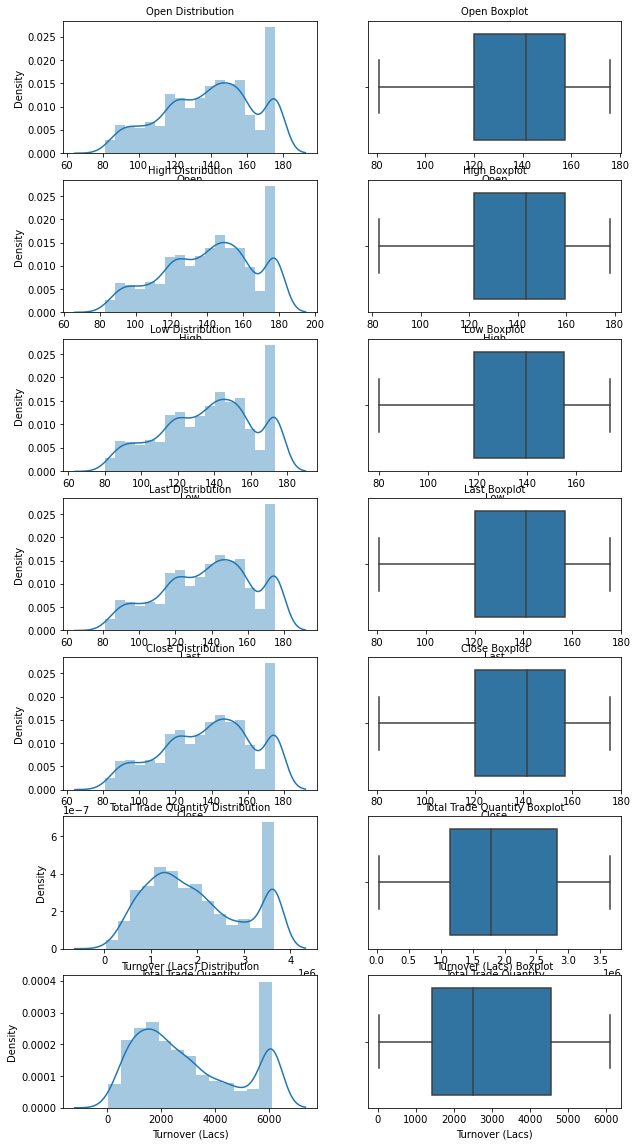

In [18]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Open'] , ax=axes[0][0])
a.set_title("Open Distribution",fontsize=10) 

a = sns.boxplot(df['Open'] , orient = "v" , ax=axes[0][1])
a.set_title("Open Boxplot",fontsize=10)

a = sns.distplot(df['High'] , ax=axes[1][0])
a.set_title("High Distribution",fontsize=10) 

a = sns.boxplot(df['High'] , orient = "v" , ax=axes[1][1])
a.set_title("High Boxplot",fontsize=10) 

a = sns.distplot(df['Low'] , ax=axes[2][0])
a.set_title("Low Distribution",fontsize=10)

a = sns.boxplot(df['Low'] , orient = "v" , ax=axes[2][1])
a.set_title("Low Boxplot",fontsize=10) 

a = sns.distplot(df['Last'] , ax=axes[3][0]) 
a.set_title("Last Distribution",fontsize=10) 

a = sns.boxplot(df['Last'] , orient = "v" , ax=axes[3][1])
a.set_title("Last Boxplot",fontsize=10); 

a = sns.distplot(df['Close'] , ax=axes[4][0]) 
a.set_title("Close Distribution",fontsize=10) 

a = sns.boxplot(df['Close'] , orient = "v" , ax=axes[4][1])
a.set_title("Close Boxplot",fontsize=10); 

a = sns.distplot(df['Total Trade Quantity'] , ax=axes[5][0]) 
a.set_title("Total Trade Quantity Distribution",fontsize=10) 

a = sns.boxplot(df['Total Trade Quantity'] , orient = "v" , ax=axes[5][1])
a.set_title("Total Trade Quantity Boxplot",fontsize=10); 

a = sns.distplot(df['Turnover (Lacs)'] , ax=axes[6][0]) 
a.set_title("Turnover (Lacs) Distribution",fontsize=10) 

a = sns.boxplot(df['Turnover (Lacs)'] , orient = "v" , ax=axes[6][1])
a.set_title("Turnover (Lacs) Boxplot",fontsize=10); 

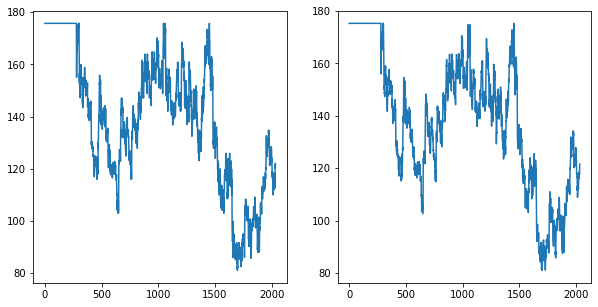

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['Open'])
plt.subplot(1,2,2)
plt.plot(df['Close'])
plt.show()

In [20]:
df1=df['Close']
df1

0       175.325
1       175.325
2       175.325
3       175.325
4       175.325
         ...   
2030    118.650
2031    117.600
2032    120.650
2033    120.900
2034    121.550
Name: Close, Length: 2035, dtype: float64

## Split the Data in Test And Train

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [22]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.42066225],
       [0.42331126],
       [0.43019868]])

In [23]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        data_X.append(a)
        data_Y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [28]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## LSTM model

In [30]:
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_split=0.1,epochs=78,batch_size=64,verbose=1)

Epoch 1/78
19/19 [==============================] - 47s 1s/step - loss: 0.1045 - val_loss: 0.0093
Epoch 2/78
19/19 [==============================] - 12s 623ms/step - loss: 0.0118 - val_loss: 0.0068
Epoch 3/78
19/19 [==============================] - 12s 636ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 4/78
19/19 [==============================] - 11s 562ms/step - loss: 0.0058 - val_loss: 0.0066
Epoch 5/78
19/19 [==============================] - 10s 540ms/step - loss: 0.0050 - val_loss: 0.0064
Epoch 6/78
19/19 [==============================] - 11s 564ms/step - loss: 0.0046 - val_loss: 0.0063
Epoch 7/78
19/19 [==============================] - 11s 590ms/step - loss: 0.0045 - val_loss: 0.0062
Epoch 8/78
19/19 [==============================] - 11s 553ms/step - loss: 0.0044 - val_loss: 0.0060
Epoch 9/78
19/19 [==============================] - 11s 607ms/step - loss: 0.0042 - val_loss: 0.0057
Epoch 10/78
19/19 [==============================] - 11s 604ms/step - loss: 0.0041 - val_loss:

## Predict and Check Performance

In [34]:
test_predict=model.predict(X_test)

In [35]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[129.30933 ],
       [127.93981 ],
       [125.518   ],
       [122.831436],
       [120.85914 ],
       [120.14112 ],
       [121.04441 ],
       [119.88564 ],
       [118.91868 ],
       [119.33612 ],
       [119.6243  ],
       [118.7975  ],
       [117.10758 ],
       [115.53086 ],
       [114.88574 ],
       [115.2019  ],
       [115.66887 ],
       [115.56922 ],
       [116.19556 ],
       [117.60842 ],
       [118.82178 ],
       [119.70579 ],
       [119.67868 ],
       [118.59255 ],
       [117.30185 ],
       [116.78948 ],
       [116.28948 ],
       [114.278915],
       [111.75907 ],
       [109.695175],
       [108.11076 ],
       [106.83067 ],
       [106.135155],
       [106.32991 ],
       [106.57703 ],
       [107.27485 ],
       [108.90098 ],
       [110.452225],
       [111.76319 ],
       [111.897644],
       [111.00902 ],
       [109.28669 ],
       [107.454025],
       [106.31223 ],
       [106.25557 ],
       [106.79706 ],
       [108.01504 ],
       [109.5

## Clusering

In [36]:
import math
from sklearn.metrics import mean_squared_error

In [37]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.037001556792278574

- HARSH ALKESH PANDYA
- 17 April 2022
- LGM TASK 2 (Stock Market Prediction And Forecasting Using Stacked LSTM)
                                                                                                                Thank You!